*__Principal Component Analysis(PCA): Income Evaluation__*

In [1]:
%matplotlib inline

In [2]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [3]:
from common import *
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

In [4]:
np.random.seed(0)

In [5]:
import warnings; warnings.simplefilter('ignore')

In [15]:
# Dataset Phone Price
x_train, x_test, y_train, y_test = read_dataset_income(path_to_file="../Data/dataset1/income_evaluation.csv")
x_train.head()

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country
23235,19,4,15,4,12,4,0,15,39
7725,53,4,11,0,7,4,1,50,39
19488,32,4,8,0,4,4,0,40,39
11585,33,7,12,4,10,2,0,35,39
6366,59,4,11,4,7,4,1,40,39


In [13]:
standard_scaler = MinMaxScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.fit_transform(x_test)

In [16]:
for i in range(2, 9):
    pca = PCA(n_components=i, random_state=0)
    pca.fit_transform(x_train.values)
    x_new = pca.fit_transform(x_train.values)
#     rc_err = mean_squared_error(x_train.values, np.dot(x_new, np.linalg.pinv(pca.components_.T)))
    print(f"Dimension={i}, Sum: {sum(pca.explained_variance_ratio_)}")

Dimension=2, Sum: 0.7751712068246335
Dimension=3, Sum: 0.9137595177837385
Dimension=4, Sum: 0.9548688059665196
Dimension=5, Sum: 0.9888317549135243
Dimension=6, Sum: 0.9936107720361393
Dimension=7, Sum: 0.9979280247183966
Dimension=8, Sum: 0.9995328807249443


In [39]:
# After chosing the best component
best_component = 5
pca = PCA(n_components=best_component, random_state=0)
xn = pca.fit_transform(x_train)
for i in range(1, best_component):
    x_train[f"pca-{i}"] = xn[:, i]

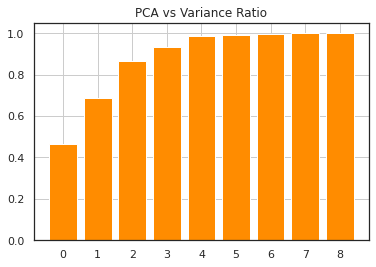

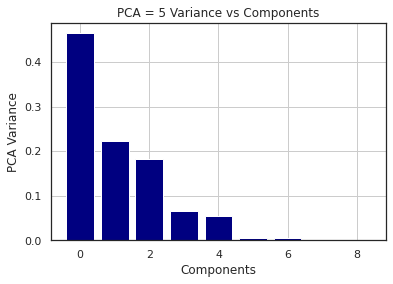

In [40]:
sums_pca = []
for i in range(1, 10):
    pca = PCA(n_components=i, random_state=0)
    pca.fit_transform(x_train)
    sums_pca.append(sum(pca.explained_variance_ratio_))

pca2 = PCA(n_components=5, random_state=0)
pca2.fit_transform(x_train)

plt.figure()
plt.title(f"PCA vs Variance Ratio")
plt.bar(range(len(sums_pca)), sums_pca, color="darkorange")
plt.xticks(range(len(sums_pca)))
plt.grid()
plt.show()

plt.figure()
plt.title(f"PCA = 5 Variance vs Components")
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, color='navy')
plt.xlabel("Components")
plt.ylabel("PCA Variance")
plt.grid()
plt.show()

In [43]:
np.array(y_train['income']).reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [44]:
# Iterate over components and see which one results in least KMeans error
pca_score = []
for i in range(1, 10):
    pca = PCA(n_components=i, random_state=0)
    xtr = pca.fit_transform(x_train_scaled)  
    kmm = KMeans(n_clusters=2, max_iter=100, random_state=0, n_jobs=-1).fit(xtr)
    pca_score.append(accuracy_score(kmm.labels_, y_train))
# Same - even here the minimum number of components  = 5

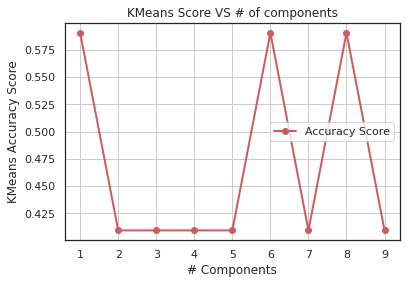

In [45]:
plt.figure()
plt.title("KMeans Score VS # of components")
plt.plot(range(1, 10), pca_score, 'o-', lw=2, color='indianred', label="Accuracy Score")
plt.xlabel("# Components")
plt.ylabel("KMeans Accuracy Score")
plt.legend()
plt.xticks(range(1, 10))
plt.legend(loc='best')
plt.grid()

In [32]:
x_train

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8
23235,19,4,15,4,12,4,0,15,39,-18.873723,-2.520749,5.381183,-5.832450,0.333608,0.110276,-0.398659,0.425044
7725,53,4,11,0,7,4,1,50,39,5.420842,-2.278094,0.238237,-0.486247,-1.691013,-1.032626,-0.165731,-0.155083
19488,32,4,8,0,4,4,0,40,39,1.297011,-2.210494,-2.220792,2.695491,-2.641925,-1.073978,-0.129027,0.729205
11585,33,7,12,4,10,2,0,35,39,-3.504460,-2.298692,3.614314,-2.198555,-0.331064,3.009055,1.779592,0.559292
6366,59,4,11,4,7,4,1,40,39,-5.872389,-2.287822,0.598406,-0.726346,1.626930,1.092565,-0.367572,-0.315053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23138,18,4,11,4,1,4,0,40,39,4.987568,-2.356839,-5.695942,0.232328,0.350468,1.003843,-0.317816,0.580578
4337,33,0,9,4,0,1,1,80,30,39.246340,6.886545,-7.986365,3.047797,3.825006,-2.220066,2.383027,-0.292273
6031,61,5,9,5,12,4,0,30,39,-15.914470,-2.180326,6.199984,0.312672,2.014898,2.075228,-0.349149,0.639692
11307,40,4,15,2,3,4,1,44,39,3.088209,-2.506347,-4.169121,-4.000536,-0.583433,0.129314,-0.267288,-0.311730


<AxesSubplot:xlabel='pca-1', ylabel='pca-2'>

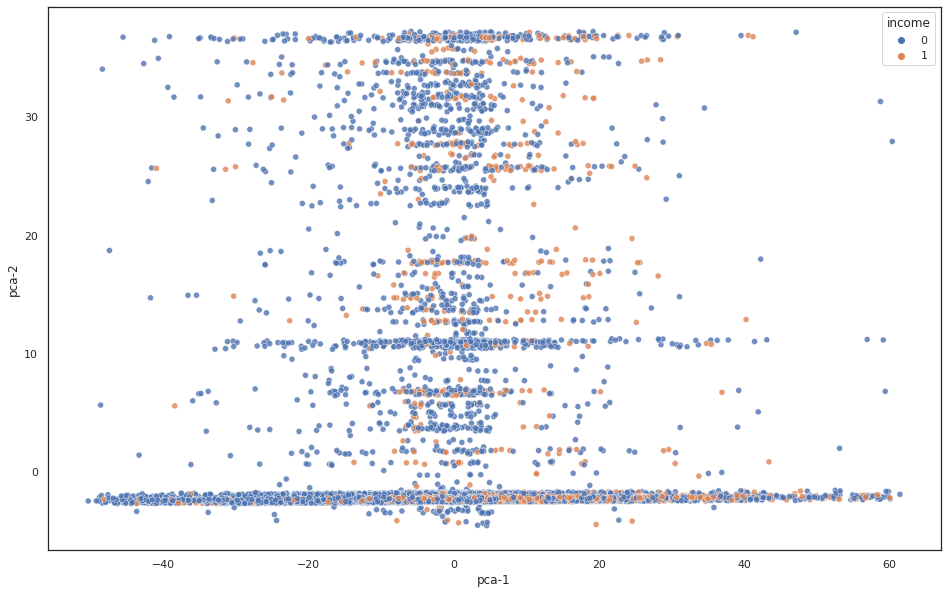

In [35]:
x_train['income'] = y_train['income']
plt.figure(figsize=(16,10))
sns.set_theme(style="white")
sns.scatterplot(
    x="pca-1", y="pca-2",
    hue="income",
    data=x_train,
    legend="full",
    alpha=0.8
)

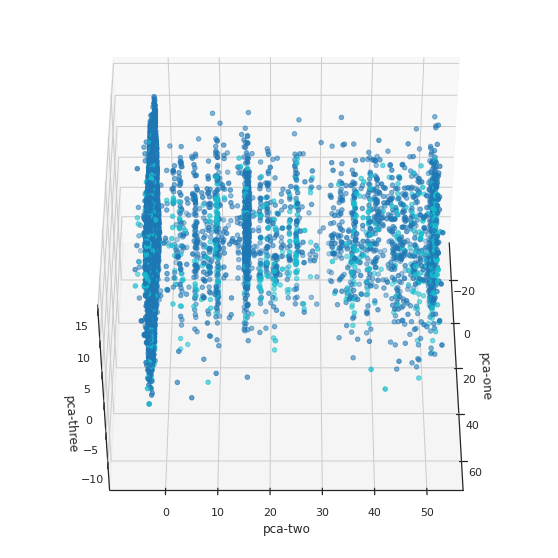

In [69]:
rndperm = np.random.permutation(x_train.shape[0])
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=x_train["pca-1"], 
    ys=x_train["pca-2"], 
    zs=x_train["pca-3"], 
    c=x_train["income"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.view_init(45, 0)
plt.show()

In [48]:
s = {}
h = {}

for i in range(2, 10):
    print(f"cluster: {i}")
    kmeans = KMeans(n_clusters=i, n_init=50, max_iter=1000, random_state=0, n_jobs=-1).fit(xn)
    label = kmeans.labels_
    s[i] = silhouette_score(xn, label, metric='euclidean')
    h[i] = homogeneity_score(y_train['income'].values, label)
    print(s[i])
    print(h[i])
    print("\n")


cluster: 2
0.2428105803709649
0.00024170484118163203


cluster: 3
0.26550909261343447
0.06517013918998948


cluster: 4
0.2997329474535074
0.061823624264905695


cluster: 5
0.315734936277228
0.06380961942657125


cluster: 6
0.3263581397375535
0.0777496676033031


cluster: 7
0.25545256807995964
0.09397326095601788


cluster: 8
0.2597239854114052
0.1055553669912635


cluster: 9
0.2627545271142214
0.10631422117723409




In [50]:
sdf = pd.DataFrame(list(s.values()), columns=['Silhouette'])
sdf['Homogeneity'] = pd.DataFrame(list(h.values()))

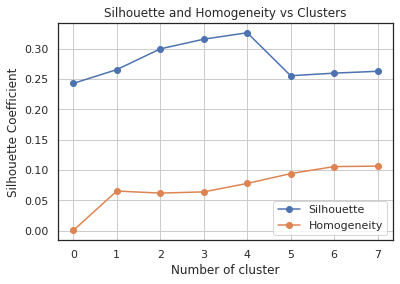

In [52]:
plt.figure()
plt.title("Silhouette and Homogeneity vs Clusters")
plt.plot(sdf, 'o-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.legend(sdf.columns)
plt.show()

In [72]:
# # Obtain centroids via KMeans
# clf_k = KMeans(n_clusters=2, n_init=50, max_iter=1000,random_state=0, n_jobs=-1).fit(x_train)
# df_x_train = pd.DataFrame(clf_k.labels_, columns=['labels'])
xtr

array([[ 0.72712212, -0.32969672,  0.17878831, ...,  0.47227984,
         0.42968411,  0.08369999],
       [-0.2537947 , -0.60569796, -0.03002618, ...,  0.33379855,
        -0.18301785, -0.06827227],
       [-0.31885509, -0.28435549, -0.09526553, ..., -0.02264428,
         0.04509624, -0.03251861],
       ...,
       [-0.37101538, -0.19545173, -0.35684291, ..., -0.06075676,
         0.11559412, -0.08075509],
       [-0.35969579, -0.23294745, -0.15163206, ...,  0.35301077,
         0.37257473, -0.07245924],
       [-0.33670832, -0.00765513, -0.29044073, ...,  0.28243155,
        -0.16495872, -0.06318408]])

In [79]:
# KMeans
clf_mlp = MLPClassifier()
start_time = time.time()
clf_mp = clf_mlp.fit(xtr, y_train)
y_pred = clf_mlp.predict(xtr)
print(f"Accuracy Score: {accuracy_score(y_pred, y_train)}")
print(classification_report(y_train, y_pred))
print(time.time() - start_time)

Accuracy Score: 0.7597512285012284
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     19788
           1       1.00      0.00      0.00      6260

    accuracy                           0.76     26048
   macro avg       0.88      0.50      0.43     26048
weighted avg       0.82      0.76      0.66     26048

10.294047594070435


In [75]:
xtr.shape

(26048, 9)

In [76]:
y_train.shape

(26048, 1)

In [77]:
y_test.shape

(6513, 1)

In [78]:
y_pred.shape

(26048,)